In [1]:
#!pip install datasets

In [2]:
from datasets import load_dataset

In [3]:
dataset = load_dataset("cornell-movie-review-data/rotten_tomatoes")

### Dataset Summary
Movie Review Dataset: This dataset contains 5,331 positive and 5,331 negative processed sentences from Rotten Tomatoes movie reviews. This data was initially utilized in the research paper titled "Seeing stars: Exploiting class relationships for sentiment categorization with respect to rating scales" by Bo Pang and Lillian Lee, published in the Proceedings of the ACL in 2005.

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
})

#### This dataset is similar to a Python dictionary, where each key corresponds to a different split. We can use the usual dictionary syntax to access an individual split.

In [5]:
train_ds = dataset["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 8530
})

In [6]:
train_ds[0]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

In [7]:
print(train_ds.features)

{'text': Value(dtype='string', id=None), 'label': ClassLabel(names=['neg', 'pos'], id=None)}


In [8]:
import pandas as pd

dataset.set_format(type="pandas")
df = dataset["train"][:]
df.head()

,text,label
0,the rock is destined to be the 21st century's ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic,1
3,if you sometimes like to go to the movies to h...,1
4,"emerges as something rare , an issue movie tha...",1


In [9]:
print(df.shape)
print(df.dtypes)

(8530, 2)
text     object
label     int64
dtype: object


#### In the `df` DataFrame, labels are represented as integers. We utilize the `int2str()` method to generate a new column in our DataFrame containing the corresponding label names.

In [10]:
def label_int2str(row):
    return dataset["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,the rock is destined to be the 21st century's ...,1,pos
1,"the gorgeously elaborate continuation of "" the...",1,pos
2,effective but too-tepid biopic,1,pos
3,if you sometimes like to go to the movies to h...,1,pos
4,"emerges as something rare , an issue movie tha...",1,pos


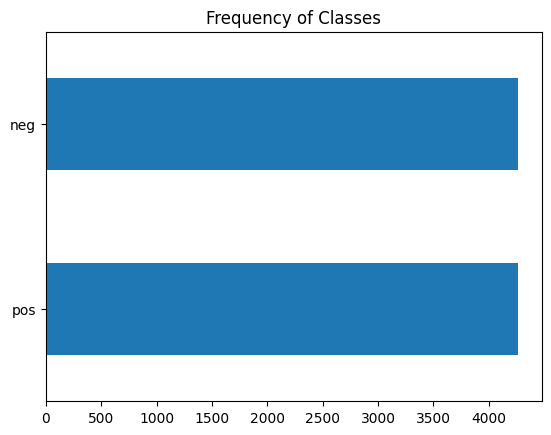

In [11]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

#### The dataset is balanced with 4265 positive and 4265 negative reviews.

In [12]:
# Check for label count
df["label"].value_counts()

1    4265
0    4265
Name: label, dtype: int64

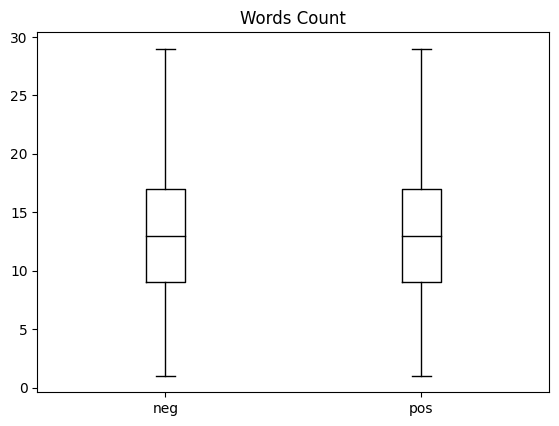

In [30]:
df["Words Count"] = df["text"].str.split().apply(len)
df.boxplot("Words Count", by="label_name", grid=False, showfliers=False,
           color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

#### Most reviews are approximately 20 words in length, with a similar word count distribution for both positive and negative reviews.

In [31]:
df.isnull().sum()

text                0
label               0
label_name          0
Words Per Review    0
Words Count         0
dtype: int64

In [32]:
df.isna().sum()

text                0
label               0
label_name          0
Words Per Review    0
Words Count         0
dtype: int64

#### There are no missing values.

In [33]:
# search for duplicates
df["text"].value_counts()

rock destined 21st century 's new `` conan `` 's going make splash even greater arnold schwarzenegger , jean-claud van damme steven segal .        1
conforms creating game 'who 's ' . . . characters ' moves often predictable consequences .                                                         1
's film idea buried somewhere inside fabric , never clearly seen felt .                                                                            1
horror movie seriously dumb characters , somewhat dilutes pleasure watching stalked creepy-crawly bug things live darkness .                       1
pap invested undergraduate doubling subtexts ridiculous stabs existentialism reminding discovery wizard god fifth trek flick .                     1
                                                                                                                                                  ..
caffeinated , sloppy brilliance , sparkling ideas wish developed care , animated energy puts dutiful effor

#### There are no duplicates as the value count begins and concludes with a frequency of 1.

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def preprocessing(text):     
    # Tokenize the text using NLTK
    new_words = word_tokenize(text)
     
    # Remove stopwords using NLTK
    new_filtered_words = [word for word in new_words if word.lower() not in stopwords.words('english')]
     
    # Join the filtered words to form a clean text
    new_clean_text = ' '.join(new_filtered_words)
    return new_clean_text

text = df["text"][4]
print("Original Text:", text)
new_clean_text = preprocessing(text)
print("Text after Stopword Removal:", new_clean_text)

Original Text: emerges something rare , issue movie 's honest keenly observed n't feel like one .
Text after Stopword Removal: emerges something rare , issue movie 's honest keenly observed n't feel like one .


In [35]:
df["text"] = df["text"].apply(preprocessing)
df.head()

,text,label,label_name,Words Per Review,Words Count
0,rock destined 21st century 's new `` conan `` ...,1,pos,34,24
1,gorgeously elaborate continuation `` lord ring...,1,pos,39,29
2,effective too-tepid biopic,1,pos,4,3
3,"sometimes like go movies fun , wasabi good pla...",1,pos,21,11
4,"emerges something rare , issue movie 's honest...",1,pos,21,15


In [36]:
df.tail()

,text,label,label_name,Words Per Review,Words Count
8525,enjoyment hinge personal threshold watching sa...,0,neg,20,12
8526,legendary shlockmeister ed wood ever made movi...,0,neg,34,25
8527,hardly nuanced portrait young woman 's breakdo...,0,neg,19,13
8528,"interminably bleak , say nothing boring .",0,neg,9,7
8529,"things really get weird , though particularly ...",0,neg,19,13


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfV = TfidfVectorizer(stop_words = 'english')
vecTor=  tfidfV.fit_transform(df["text"])
print(vecTor.shape)

(8530, 16173)


In [38]:
print(vecTor[0])

  (0, 12078)	0.20542244227534653
  (0, 3807)	0.250375339742423
  (0, 86)	0.2551369562463637
  (0, 2237)	0.21500293084046376
  (0, 9587)	0.15184171838658697
  (0, 2842)	0.2676615156755108
  (0, 6171)	0.1767096674335419
  (0, 8673)	0.14332096092577665
  (0, 13430)	0.2551369562463637
  (0, 6300)	0.24625063991218146
  (0, 843)	0.22896446397909373
  (0, 12435)	0.2393578774678229
  (0, 7766)	0.2393578774678229
  (0, 2520)	0.28907239143884006
  (0, 15406)	0.2312536121273612
  (0, 3428)	0.27654783200969296
  (0, 13647)	0.2179470017044936
  (0, 12562)	0.28907239143884006


In [39]:
tfidfV_1000 = TfidfVectorizer(max_features = 1000, stop_words = 'english')
vecTor_1000=  tfidfV_1000.fit_transform(df["text"])
# print(df.shape)
print(vecTor_1000.shape)

(8530, 1000)


In [40]:
print(vecTor_1000[0])

  (0, 718)	0.4474716137670591
  (0, 104)	0.46834078770650434
  (0, 574)	0.3307567469796541
  (0, 357)	0.3849265892221217
  (0, 509)	0.31219598482886696
  (0, 811)	0.47475385594763736
